In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/sample_data/usa_dataset.csv')

In [ ]:
data.head()

,dates,gasoline_price,crude_oil_Price
0,15-01-2001,1.47,29.59
1,15-02-2001,1.48,29.61
2,15-03-2001,1.41,27.25
3,15-04-2001,1.50,27.49
4,15-05-2001,1.71,28.63


In [ ]:
data.set_index('dates',inplace=True)
data.index = pd.DatetimeIndex(data.index)


<ipython-input-4-32b39220c2db>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data.index = pd.DatetimeIndex(data.index)


In [ ]:
df_train_transformed = data.diff().dropna()

In [ ]:
df_train_transformed.head()


,gasoline_price,crude_oil_Price
dates,,
2001-02-15,0.01,0.02
2001-03-15,-0.07,-2.36
2001-04-15,0.09,0.24
2001-05-15,0.21,1.14
2001-06-15,-0.06,-1.03


In [ ]:
aggregate_data = df_train_transformed.pivot_table(index=df_train_transformed.index.date)
aggregate_data.head()


,crude_oil_Price,gasoline_price
2001-02-15,0.02,0.01
2001-03-15,-2.36,-0.07
2001-04-15,0.24,0.09
2001-05-15,1.14,0.21
2001-06-15,-1.03,-0.06


In [ ]:
#column_list1=df_train_transformed
cc='gasoline_price'

<Axes: >

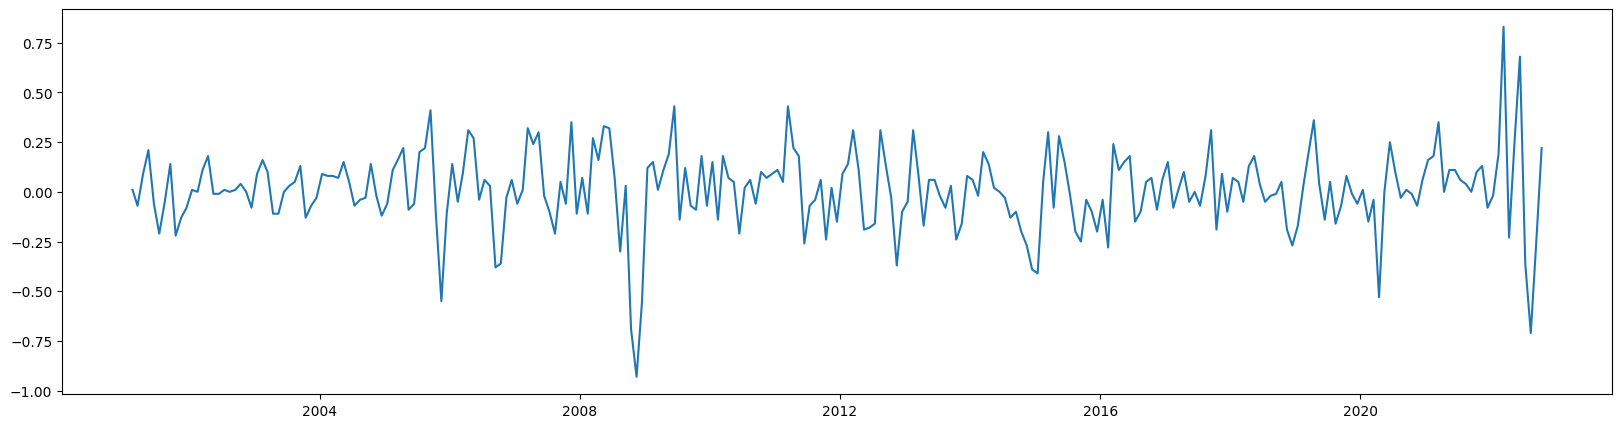

In [ ]:
column_list = aggregate_data[cc].astype(float).tolist()
aggregate_data[cc].plot(figsize=[20,5])
 


In [ ]:
len_training = int(len(column_list)*.95)


In [ ]:
len_training

247

In [ ]:
train,test = column_list[:len_training], column_list[len_training:]


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
predicted_list, error_list = [], []
training_data = train 

In [ ]:
print(len(test))

14


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
for t in range(len(test)):
 model = ARIMA(training_data, order=(0,2,2))
 model_fit = model.fit()
 predicted_value = model_fit.forecast()
 #print(predicted_value)
 predicted_value = predicted_value[0]
 error_list.append(test[t] - predicted_value)
 predicted_list.append(predicted_value)
 obs = test[t]
 training_data.append(obs)
 

In [ ]:
error_list

[]

In [ ]:
print(model_fit.summary())
predicted_value = model_fit.summary()
predicted_value = predicted_value

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  260
Model:                 ARIMA(0, 2, 2)   Log Likelihood                  40.718
Date:                Mon, 01 May 2023   AIC                            -75.436
Time:                        14:56:04   BIC                            -64.777
Sample:                             0   HQIC                           -71.150
                                - 260                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.9949      0.094    -21.184      0.000      -2.179      -1.810
ma.L2          0.9951      0.093     10.708      0.000       0.813       1.177
sigma2         0.0399      0.005      8.023      0.0

In [ ]:
error = mean_squared_error(test, predicted_list)
print('Test MSE: %.3f' % error)


Test MSE: 0.151


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt


In [ ]:
  rmse = sqrt(mean_squared_error(test, predicted_list))
  print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.389


In [ ]:
model = ARIMA(train, order=(0,2,2))
model_fit = model.fit()
training_error = model_fit.resid

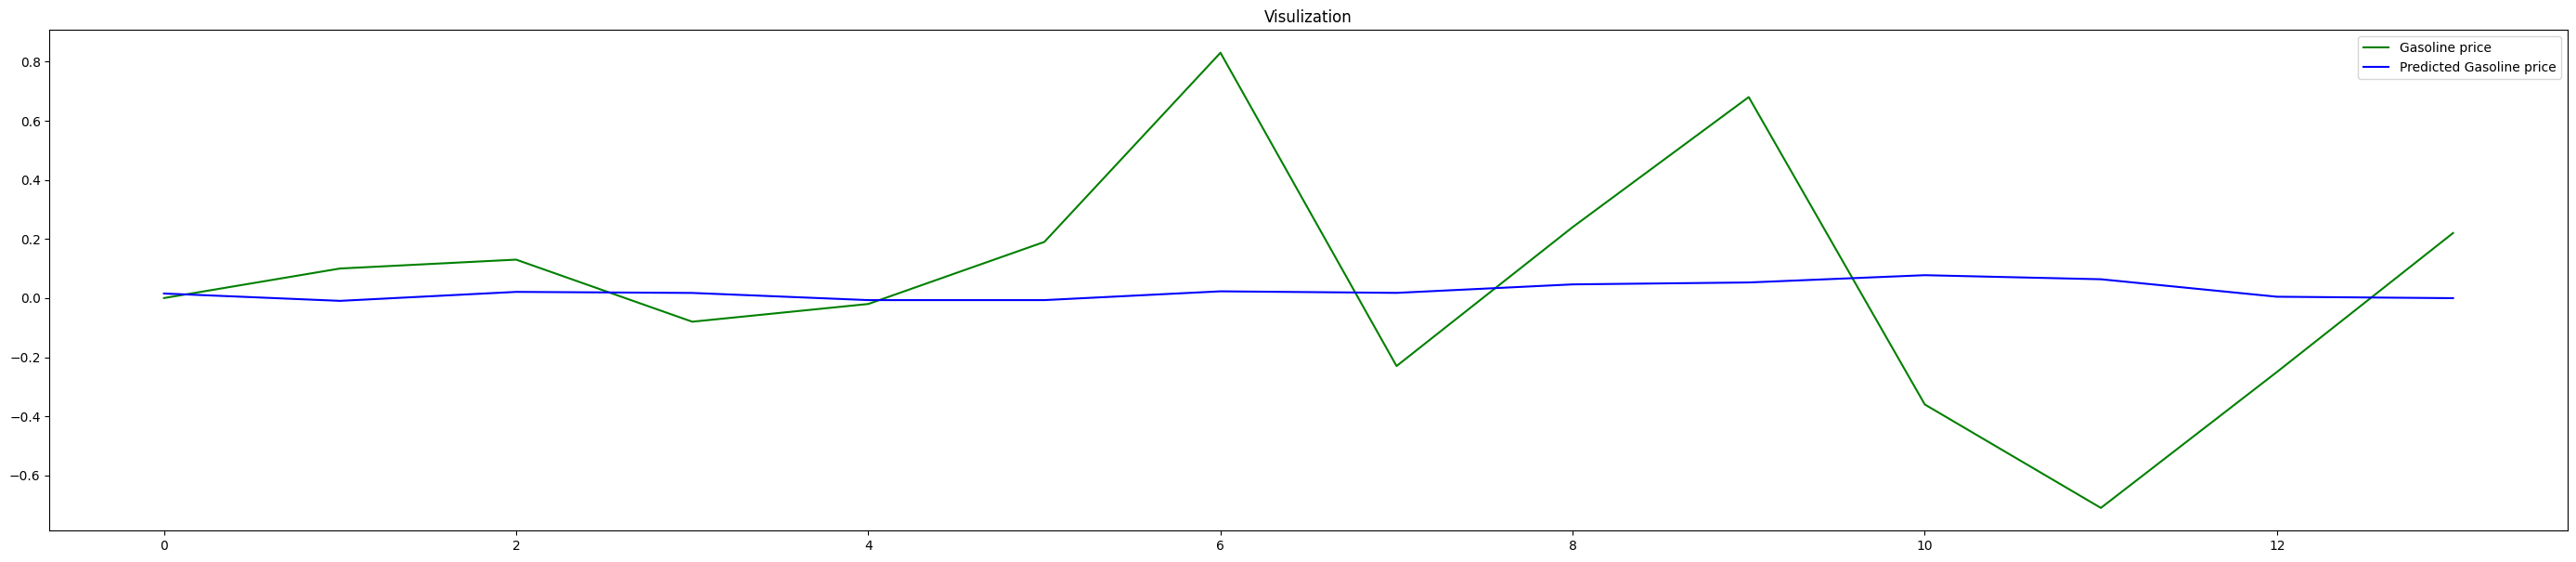

In [ ]:
#gasoline=combined['gasoline_price']
#pred_gas=combined['gasoline_price_pred']

plt.figure(figsize=(35,7))
fig=plt.figure(1)

std=plt.plot(test,color='green',label='Gasoline price')
orig1=plt.plot(predicted_list,color='blue',label='Predicted Gasoline price')


plt.legend(loc='best')
plt.title('Visulization')
plt.show(block=False)

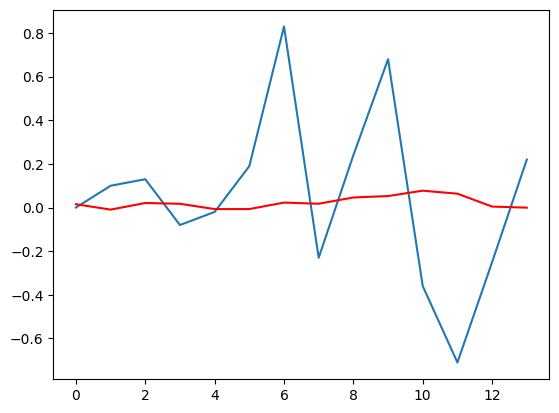

In [ ]:
plt.plot(test)
plt.plot(predicted_list, color='red')
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

In [ ]:
window_size = 8
def make_model(window_size):
 np.random.seed(1)
model = Sequential()
model.add(Dense(100, input_dim=window_size,
activation="ReLU"))
model.add(Dense(50, activation="ReLU"))
model.add(Dense(25, activation="ReLU"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               900       
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 7,251
Trainable params: 7,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - window_size):
 train_X.append(training_error[i:i+window_size])
 train_Y.append(training_error[i+window_size])

In [ ]:
len(training_error)


261

In [ ]:
new_train_X,new_train_Y = [],[]
for i in train_X:
 new_train_X.append(i.reshape(-1))
for i in train_Y:
 new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)

In [ ]:
model.fit(new_train_X,new_train_Y, epochs=1500, batch_size=8,verbose=1)

Epoch 1/1500
32/32 [==============================] - 1s 1ms/step - loss: 0.0436
Epoch 2/1500
32/32 [==============================] - 0s 1ms/step - loss: 0.0381
Epoch 3/1500
32/32 [==============================] - 0s 1ms/step - loss: 0.0354
Epoch 4/1500
32/32 [==============================] - 0s 1ms/step - loss: 0.0324
Epoch 5/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0306
Epoch 6/1500
32/32 [==============================] - 0s 1ms/step - loss: 0.0291
Epoch 7/1500
32/32 [==============================] - 0s 1ms/step - loss: 0.0277
Epoch 8/1500
32/32 [==============================] - 0s 1ms/step - loss: 0.0268
Epoch 9/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0254
Epoch 10/1500
32/32 [==============================] - 0s 1ms/step - loss: 0.0242
Epoch 11/1500
32/32 [==============================] - 0s 1ms/step - loss: 0.0227
Epoch 12/1500
32/32 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 13/1500
32/32 [====

In [ ]:
test_data = []
for i in error_list:
  try:
     test_data.append(i[0])
  except:
     test_data.append(i)


In [ ]:
test_data = np.array(test_data)

In [ ]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - window_size):
 test_X.append(test_data[i:i+window_size])
 test_Y.append(test_data[i+window_size])

In [ ]:
len(test)

14

In [ ]:
new_test_X,new_test_Y = [],[]
for i in test_X:
 new_test_X.append(i.reshape(-1))
for i in test_Y:
 new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)


In [ ]:
predictions = model.predict(new_test_X)
Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)


1/1 [==============================] - 0s 123ms/step


In [ ]:
predictions

array([[ 0.14733663],
       [ 0.588967  ],
       [-0.38032618],
       [-0.7168381 ],
       [-0.31634662],
       [ 0.17749637]], dtype=float32)

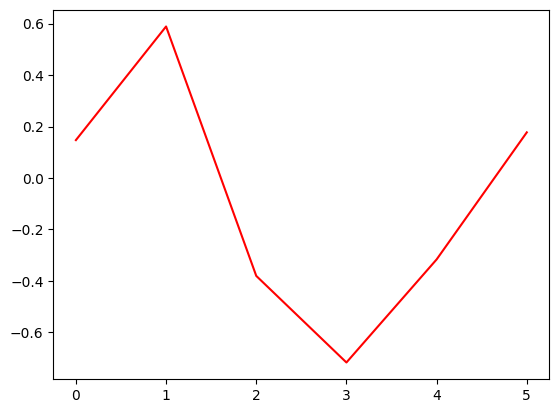

Test MSE: 0.003


In [ ]:
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[window_size:],predictions)
print('Test MSE: %.3f' % error)


In [ ]:
#@title Hybrid


In [ ]:
pred_final = predictions + predicted_list[window_size:]
#error = mse(test[window_size:],pred_final)
print('Test MSE: %.3f' % error)


Test MSE: 0.003


In [ ]:
test_data[window_size:]

array([ 0.19370881,  0.62721426, -0.43740358, -0.77360052, -0.25450686,
        0.22035401])

In [ ]:
predictions

array([[ 0.14733663],
       [ 0.588967  ],
       [-0.38032618],
       [-0.7168381 ],
       [-0.31634662],
       [ 0.17749637]], dtype=float32)

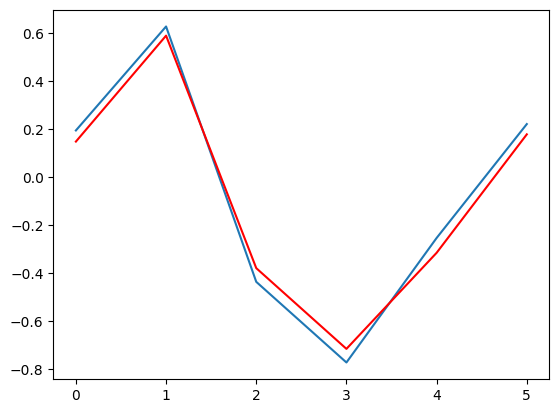

Test MSE: 0.003


In [ ]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[window_size:],predictions)
print('Test MSE: %.3f' % error)


In [ ]:
predictions

array([[ 0.2133832 ],
       [ 0.5769355 ],
       [-0.4387147 ],
       [-0.78852665],
       [-0.31553406],
       [ 0.16506848]], dtype=float32)

In [ ]:
len=242

In [ ]:
data_actual=data[:len]

In [ ]:
data_actual

,gasoline_price,crude_oil_Price
dates,,
2001-01-15,1.47,29.59
2001-02-15,1.48,29.61
2001-03-15,1.41,27.25
2001-04-15,1.50,27.49
2001-05-15,1.71,28.63
...,...,...
2020-10-15,2.17,39.40
2020-11-15,2.10,40.94
2020-12-15,2.16,47.02


In [ ]:
length=236

In [ ]:
df_test=data_actual[length:]
df_test=df_test['gasoline_price']
df_test=pd.DataFrame(df_test)

In [ ]:
predictions

array([[ 0.14733663],
       [ 0.588967  ],
       [-0.38032618],
       [-0.7168381 ],
       [-0.31634662],
       [ 0.17749637]], dtype=float32)

In [ ]:
pred_data_df = pd.DataFrame(predictions, index = df_test.index, columns = df_test.columns + '_pred')

In [ ]:
df_train=df_train_transformed['gasoline_price']
df_train=pd.DataFrame(df_train)

In [ ]:
def invert_transformation(df, pred1):
    forecast = pred_data_df.copy()
    columns = df.columns
    for col in columns:
        forecast[str(col)+'_pred'] = df[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
    return forecast
inverted_pred_values = invert_transformation(df_train, pred_data_df)

In [ ]:
DF=data['gasoline_price']
DF=pd.DataFrame(DF)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(DF)
data_scaled = scaler.transform(DF)
data_scaled_df = pd.DataFrame(data_scaled, index = DF.index, columns = DF.columns)

In [ ]:
unscaledData = scaler.inverse_transform(pred_data_df)
unscaledDataDF = pd.DataFrame(unscaledData, index = pred_data_df.index, columns = pred_data_df.columns)

In [ ]:
r=pd.DataFrame()
r['gasoline_pred']=unscaledDataDF['gasoline_price_pred']
r['gasoline_actual']=df_test['gasoline_price']
r

,gasoline_pred,gasoline_actual
dates,,
2020-09-15,2.730412,2.18
2020-10-15,3.068114,2.17
2020-11-15,2.326924,2.10
2020-12-15,2.069603,2.16
2021-01-15,2.375847,2.32
2021-02-15,2.753474,2.50


In [ ]:
t=r['gasoline_actual']
pred1=r['gasoline_pred']
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(t,pred1))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.454
